<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M3/M%C3%B3dulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/pikey-msc/CursoDF'

Cloning into 'CursoDF'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 69 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [0]:
%load_ext rpy2.ipython

## Regresión lineal

En el análisis de regresión lineal múltiple se utiliza más de una variable explicativa, se busca definir que, del conjunto de variables, cuales son las que más influyen. Los valores de la variable dependiente $Y$ se generan a partir de una combinación lineal de los valores de una o más variables explicativas y un término aleatorio
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + u$ 
Los coeficientes son elegidos de forma que la suma de cuadrados entre los valores observados y los pronosticados sea mínima, es decir, que se va a minimizar la varianza residual.

En la práctica se debe elegir cuidadosamente las variables que se consideraran como explicativas. Algunos criterios que deben de cumplir son los siguientes:

*   Tener sentido numérico
*   Evitar variables repetidas o redundantes

*   Justificación teórica
*   La relación entre variables explicativas en el modelo y casos debe de ser como mínimo de 1 a 10

*   La relación de las variables explicativas con la variable dependiente debe de ser lineal, es decir, proporcional

El modelo de regresión múltiple debe cumplir con las siguientes hipótesis:


1.   Linealidad: Los valores de la variable dependiente están generados por el siguiente modelo lineal: $Y=X \beta +U$
2.   Homocedasticidad: Las perturbaciones tienen la misma varianza $V(u_i)=\sigma^2$

1.   Independencia: Las perturbaciones aleatorias son independientes entre sí.
2.   Normalidad: La distribución de la perturbación aleatoria es normal
1.   Las variables explicativas $X_k$ se obtienen son errores de medida







In [3]:
%%R
#Instalamos las bibliotecas que utilizaremos
install.packages("MPDiR")    # Donde estan los datos Chromatic
install.packages("dplyr")    # Para manipulación de datos
install.packages("ggplot2")  # Para poder gráficar
install.packages("lattice")  # Para poder graficar xyplot y condicionados
install.packages("readxl")   # Para abrir archivos en excel
install.packages("MASS")     # Para hacer regresiones de tipo binomial negativa
install.packages("caret")
install.packages("caret")    # Permite evaluar los modelos de regresion
install.packages("plotly")   # Para hacer gráficos dinámicos
install.packages("mlbench")  # Permite obtener los datos de Sonar
install.packages("e1071")    # Solucion error caret
install.packages("caTools")  # Permite calcular el score AUC de la Curva ROC
install.packages("matlib")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/MPDiR_0.1-16.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 171284 bytes (167 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/di

In [4]:
%%R
library(MPDiR)    # Donde estan los datos Chromatic
library(dplyr)    # Para manipulación de datos
library(ggplot2)  # Para poder gráficar
library(lattice)  # Para poder graficar xyplot y condicionados
library(readxl)   # Para abrir archivos en excel
library(MASS)     # Para hacer regresiones de tipo binomial negativa
library(caret)
library(caret)    # Permite evaluar los modelos de regresion
library(plotly)   # Para hacer gráficos dinámicos
library(mlbench)  # Permite obtener los datos de Sonar
library(e1071)    # Solucion error caret
library(caTools)  # Permite calcular el score AUC de la Curva ROC
library(matlib)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘MASS’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__in

Leemos el dataset con el que se generará el modelo lineal

In [5]:
%%R
data<-read.csv('/content/CursoDF/M3/Datos/ventas.csv')
str(data)
summary(data)

'data.frame':	22 obs. of  3 variables:
 $ ventas  : int  973 1119 875 625 910 971 931 1177 882 982 ...
 $ tv      : int  10 10 25 25 30 30 35 35 40 40 ...
 $ internet: int  40 40 25 25 30 30 35 35 25 25 ...
     ventas           tv           internet    
 Min.   : 625   Min.   :10.00   Min.   :10.00  
 1st Qu.: 941   1st Qu.:31.25   1st Qu.:25.00  
 Median :1148   Median :45.00   Median :30.00  
 Mean   :1225   Mean   :44.09   Mean   :30.91  
 3rd Qu.:1500   3rd Qu.:58.75   3rd Qu.:38.75  
 Max.   :1866   Max.   :70.00   Max.   :45.00  


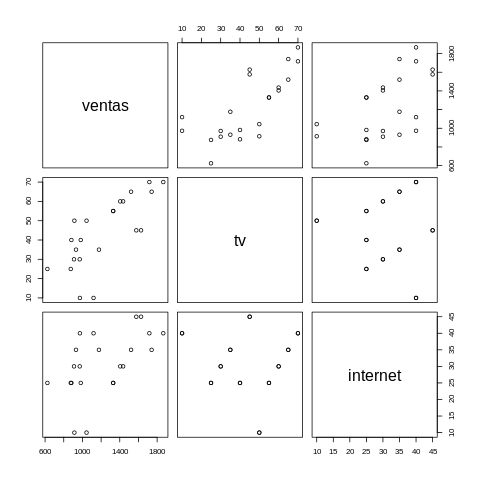

In [6]:
%%R
plot(data)

La prueba de hipótesis es:

*   Hipótesis nula: Coeficientes Bi=0
*   Hipótesis alternativa: Coeficientes Bi!=0





In [7]:
%%R
modelo<-lm(ventas~.,data = data)
summary(modelo)


Call:
lm(formula = ventas ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-245.72  -78.50   20.10   66.06  207.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -84.541    111.806  -0.756    0.459    
tv            14.857      1.464  10.146 4.16e-09 ***
internet      21.179      2.759   7.676 3.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119.6 on 19 degrees of freedom
Multiple R-squared:  0.8916,	Adjusted R-squared:  0.8802 
F-statistic: 78.15 on 2 and 19 DF,  p-value: 6.797e-10



F-statistic es 78.5, significa que nuestro modelo tiene un mejor ajuste que un modelo con coeficientes B=0. Podemos rechazar la hipótesis nula.

In [0]:
%%R
e<-data$ventas-modelo$fitted.values


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97491, p-value = 0.8209



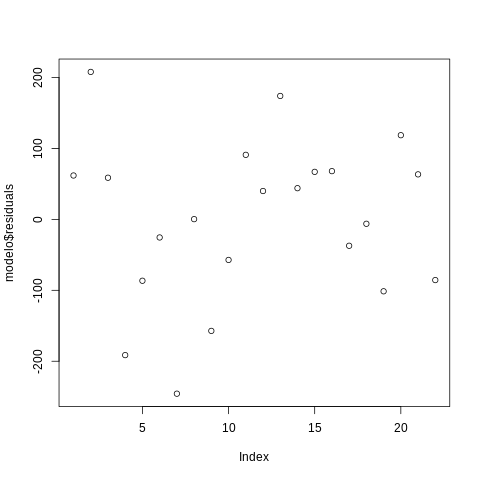

In [9]:
%%R
print(shapiro.test(modelo$residuals))
plot(modelo$residuals)

De la prueba, el p-value > 0.05 implica que la distribución del error no tiene diferencia significativa con una distribución normal.

## Modelo lineal generalizado

Cuando la estadística decriptiva de los datos Y no sigue una tendencia lineal y la varianza de Y depende de la media se usan los Modelo Lineales Generalizados (**LGM**)

Un GLM está compuesto por un predictor lineal 
$n_i=B_0 + B_1x_1 i+...+B_p x_p i $

Y dos funciones:

La función liga que describe la dependencia que existe entre la media y el predictor lineal

 $E[Y_i]=M_i$
 
 $g(M_i)=\eta_i$

La funcion de la varianza que describe la relacion entre la varianza sobre la media

$Var(y_i)=\phi V(M) $

La mayoria de las distribuciones mas utilizadas son miembros de la familia de distribucion exponencial (Ejemplo: Normal, Binomial o Poisson)

Las funciones de la familia exponencial disponibles en R son:

 - binomial(link = "logit")

 - gaussian(link = "identity")
 
 - Gamma(link = "inverse")
 
 - inverse.gaussian(link = "1/mu2")
 
 - poisson(link = "log")


### Metricas importantes de los Modelos de Regresión

- Akaike Information Criterion

- Deviance

- Root Mean Squared Error

- Confusion Matrix


#### Akaike Information Criterion

$AIC = 2k - 2ln(L)$

donde:

$L=p(x|\theta,M)$



*   $L$ es el valor maximizado de la función de verosimilitud
*   $x$ son los valores observados

*   $k$ es el número de parámetros del modelo

Consideraciones importantes:


*   Cuando se evaluan dos modelos con la misma información y las mismas variables respuestas el modelo con **MENOR AIC** es considerado mejor.
*   Entre mas complejo sea el modelo (mayor cantidad de parámetros k), mayor sera la posibilidad de que el AIC sea mayor

*   El indicador **AIC NO** indica la si la calidad del modelo es buena. Si ambos modelos candidatos se ajustan pobremente, el indicador AIC no generara una alerta de ello



#### Deviance

Se utiliza para medir la calidad de ajuste estaditico.

$D(y)=−2(log(p(y|θ0))−log(p(y|θs)))$

La Devianza Residual mide la diferencia que existe entre el Modelo Saturado y el modelo Propuesto.

La Devianza Nula mide la diferencia que existe entre el Modelo Saturado y el modelo Nulo

Se considera que un buen modelo es aquel cuya diferencia es CERCANA A CERO tanto para la Devianza Residual como para la Devianza Nula

Si la Deviaza en ambos casos es igual a cero se considera que el ajuste es perfecto. Si la Devianza es mayor a cero se dice que existe “Sobre-dispersión”

El modelo Saturado asume que cada punto tiene sus propios parametros (lo que significa que tiene n parametros)

El modelo Nulo asume exactamente lo contrario, un solo parametro para todos los puntos, por lo que solo se estima un parametro.

El modelo Propuesto asume que los puntos son modelados mediante p parametros mas un término de intercepción, por tanto que tiene $p + 1$ parámetros.


#### RMSE (Root Mean Squared Error)

$RMSE = \sqrt{\frac1n\sum_{i=1}^n(\hat{y}-y)^2}$

Donde:

$\hat{y}$ es la variable predecida

$y$ es la variable real

Tener un $RMSE = 0 $ es ideal pero no es posible en la mayoría de las situaciones. Un $RMSE = 0$ significa que el estimador predice las observaciones con una precisión perfecta.
La validación cruzada corresponde a repetir n veces el calculo del $RMSE$ al separar de manera aleatoria n veces los datos en train y test.

#### Matriz de confusión

La matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Indicadores:

Accuracy: Que tan seguido la clasificación es correcta.

$\frac{TP+TN}{Total}$

True Positive Rate: Que tan seguido la predicción es Positiva

$\frac{TP}{TotalP}$

False Positive Rate: Que tan seguido la predicción es Negativa

$\frac{FP}{TotalF}$

Specificity: Que tan seguido la clasificación y la predicción es Negativa

$1−\frac{FP}{TotalF}$

Null Error Rate: Que tan seguido la clasificación es incorrecta

$\frac{TN+FP}{Total}$

$\kappa$: Mide la diferencia entre Accuracy y Null Error Rate. entre mas grande esta métrica, mayor la diferencia

Ejemplo de *Matriz de Confuisión*


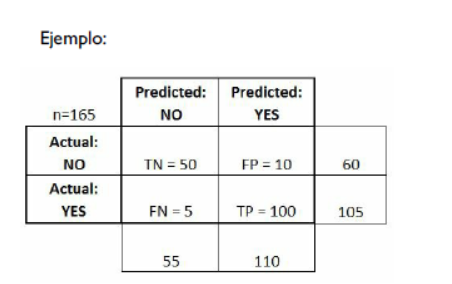

#### CURVA ROC
El análisis de la curva ROC, proporciona herramientas para seleccionar los modelos posiblemente óptimos y descartar modelos subóptimos.

Para dibujar una curva ROC sólo son necesarias las razones de True Positive Rate (TP) y de False Positive Rate (FP).

El mejor método posible de predicción se situaría en un punto en la esquina superior izquierda, o coordenada (0,1) del espacio ROC, representando un 100% de sensibilidad (ningún falso negativo) y un 100% también de especificidad (ningún falso positivo). A este punto (0,1) también se le llama una clasificación perfecta.

Los siguientes datos obtenidos en Zuur, Ieno y Hilbe [Zuur AF, Hilbe JM and Ieno EN, Beginner’s Guide to GLM and GLMM with R (2013). Springer Science Business Media New York 2007] mide la abundancia de peces a distintas profundidades, en dos periodos temporales (1979-1989 vs 1997-2002) en Atlántico noroeste. Durante el segundo periodo se desarrollo mucho la actividad pesquera comercial, que se sospecha tuvo impacto en las comunidades oceanicas. Examinaremos si la relación entre la riqueza y la profundidad ha cambiado de la base Baileyetal2008.xls

Son 148 registros en donde se indica la abundancia de peces (# de peces), la densidad, la profundidad promedio, el año, el periodo a que corresponde, las coordenadas X y Y en Km y el área de captura

In [10]:
%%R
# La opción na.action nos permite indicar que debe hacer el modelo ante variables Nulas.
# Por defalut tiene na.fail el cual dará un error en el modelo,
# Se puede cambiar a na.omit si se desean omitir los valores *Nulos*

# La opción data permite incluir la base con las columnas que deseamos utilizar para hacer el modelo.

#  residuals()     Muestra los residuales
#  fitted()        Muestra la predicción despues de aplicar la inversa de la función liga  
#  predict()       Muestra la predicción antes de aplicar la inversa de la función liga
#  Tambien es utilizado para predecir la variable respuesta (response) en nuevos datos

#  coefficients()  Muestra los coeficientes
 
#  deviance()      Muestra la devianza  
 
#  formula()       Muestra la formula   
 
#  summary()       Muestra el resumen

NULL


In [11]:
%%R
#Identificar el punto de muestreo que no pertenece a la misma población
Peces <- read_excel("/content/CursoDF/M3/Datos/Baileyetal2008.xls",sheet = "AllData")
# summary(Peces) Para ver el nombre de las columnas originaes
# cambiamos el nombre:
colnames(Peces) <- c("Sitio","Num_Peces","Densidad","Profundidad","Año","Periodo","Xkm","Ykm","Superficie")
summary(Peces)

     Sitio          Num_Peces          Densidad          Profundidad  
 Min.   :  1.00   Min.   :   2.00   Min.   :1.476e-05   Min.   : 804  
 1st Qu.: 37.75   1st Qu.:  55.75   1st Qu.:7.772e-04   1st Qu.:1420  
 Median : 74.50   Median : 153.50   Median :2.624e-03   Median :2004  
 Mean   : 74.50   Mean   : 215.62   Mean   :4.689e-03   Mean   :2424  
 3rd Qu.:111.25   3rd Qu.: 279.75   3rd Qu.:6.489e-03   3rd Qu.:3524  
 Max.   :148.00   Max.   :1230.00   Max.   :3.092e-02   Max.   :4865  
      Año          Periodo          Xkm                Ykm           
 Min.   :1977   Min.   :1.000   Length:148         Length:148        
 1st Qu.:1980   1st Qu.:1.000   Class :character   Class :character  
 Median :1982   Median :1.000   Mode  :character   Mode  :character  
 Mean   :1988   Mean   :1.345                                        
 3rd Qu.:2001   3rd Qu.:2.000                                        
 Max.   :2002   Max.   :2.000                                        
   Superficie

In [14]:
%%R
Peces

# A tibble: 147 x 9
   Sitio Num_Peces Densidad Profundidad   Año Periodo Xkm     Ykm     Superficie
   <dbl>     <dbl>    <dbl>       <dbl> <dbl>   <dbl> <chr>   <chr>        <dbl>
 1     1        76 0.00207        0.804  1978       1 98.755… -57.46…     36710 
 2     2       161 0.00352        0.808  2001       2 76.803… 178.64…     45741.
 3     3        39 0.000981       0.809  2001       2 103.79… -50.05…     39775 
 4     4       410 0.00804        0.848  1979       1 91.532… 146.44…     51000 
 5     5       177 0.00593        0.853  2002       2 107.14… -37.07…     29831.
 6     6       695 0.0218         0.96   1980       1 86.564… -48.19…     31880 
 7     7       352 0.00919        0.977  1981       1 84.217… -51.90…     38300 
 8     8       674 0.0176         0.982  1979       1 90.479… -66.73…     38260 
 9     9       624 0.0140         0.985  1982       1 -5.727… 203.91…     44600 
10    10       736 0.0140         0.986  1980       1 -4.585… 200.20…     52600 
# … with

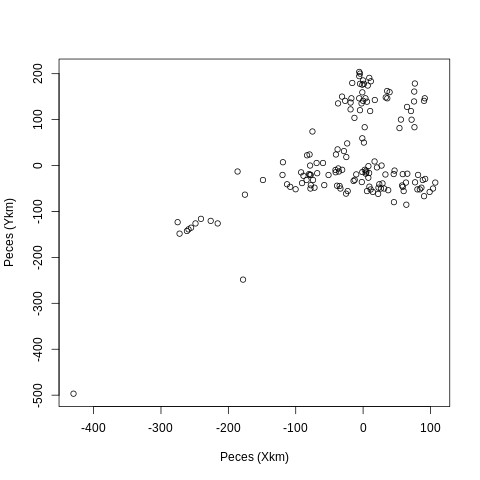

In [12]:
%%R
plot(x = Peces$Xkm, y = Peces$Ykm,xlab = list("Peces (Xkm)", cex = 1), ylab = list("Peces (Ykm)", cex = 1))

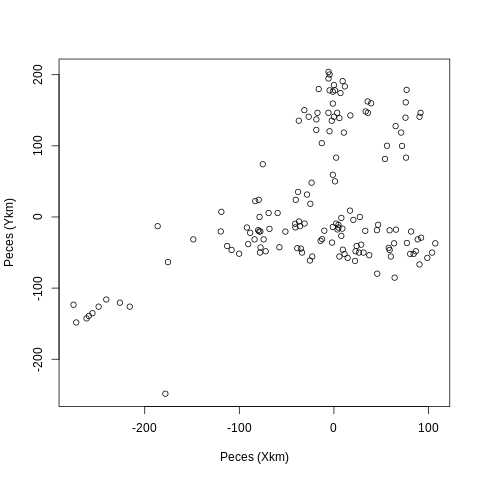

In [13]:
%%R
#Eliminar variable extrema
Peces2 <- Peces[c(-136), ]  # Eliminamos el punto extremo
Peces <- Peces2             # Sobre escribimos la información original
rm(Peces2)                  # Eliminamos Peces2
Peces$Profundidad <- Peces$Profundidad/1000 #Dividimos columna Profundidad

plot(x = Peces$Xkm, y = Peces$Ykm, xlab = list("Peces (Xkm)", cex = 1), ylab = list("Peces (Ykm)", cex = 1))  # Gráficamos

In [15]:
%%R
M0 <- lm(Num_Peces ~ Profundidad, data = Peces)
# La evaluamos
summary(M0)


Call:
lm(formula = Num_Peces ~ Profundidad, data = Peces)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.05 -102.10  -14.79   45.96  895.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   450.48      33.14  13.592  < 2e-16 ***
Profundidad   -96.95      12.22  -7.932 5.32e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 184.4 on 145 degrees of freedom
Multiple R-squared:  0.3026,	Adjusted R-squared:  0.2978 
F-statistic: 62.92 on 1 and 145 DF,  p-value: 5.319e-13



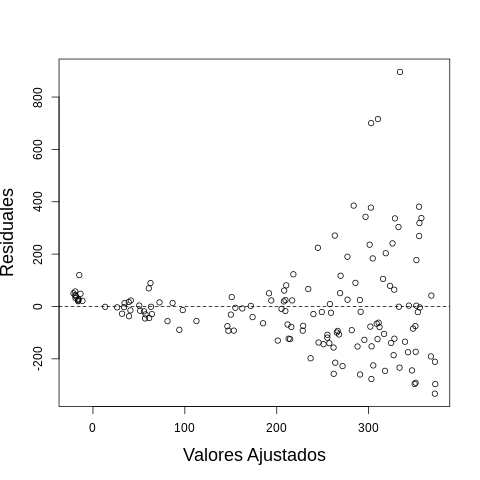

In [16]:
%%R
#Prueba de homocedasticidad
E0 <- resid(M0)
F0 <- fitted(M0)
# Grafica Residuales vs Valores Ajustados
plot(x = F0, y = E0, xlab = "Valores Ajustados", ylab = "Residuales", cex.lab = 1.5)
abline(h = 0, lty = 2)

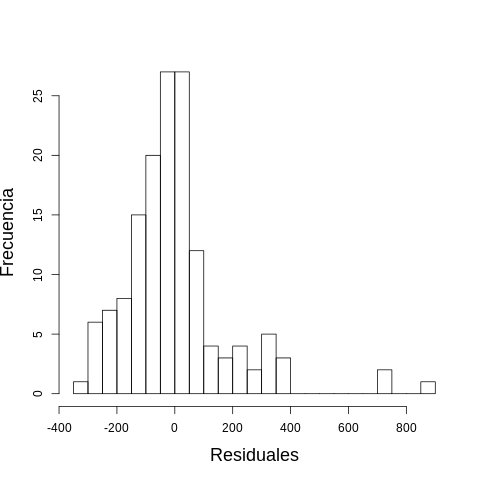

In [18]:
%%R
#Histograma
hist(E0, main = "", breaks = 40, cex.lab = 1.5, xlab = "Residuales", ylab = "Frecuencia")

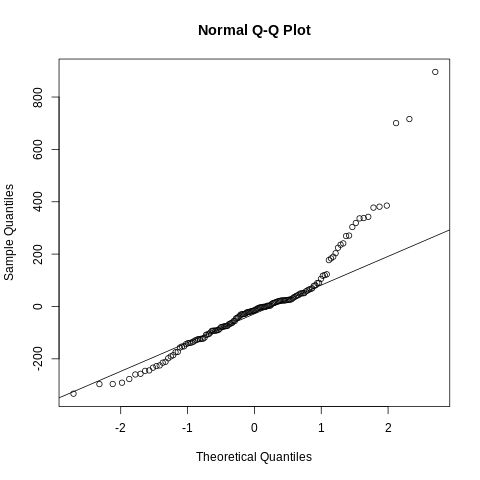

In [22]:
%%R
#Residuales vs Teórico
#Gráfica Número de peces vs Profundidad Media
qqnorm(E0)
qqline(E0)

¿Cual es la diferencia entre Intervalos de Confianza e Intervalos de predicción?

Los “Intervalos de Confianza” se enfocan en las lineas de regresión y se interpreta como: “Si deseamos repetir la muestra X veces, la linea de regresión caerá dentro de ese intervalo en el 95% de las veces”

Los “Intervalos de Predicción” se enfocan en lo puntos individuales de los datos y se interpreta como: “Si deseamos repetir la muestra X veces en un punto particular de la variable explicativa, la variable respuesta caerá dentro de ese intervalo en el 95% de las veces”

#### CONCLUSIONES
Conclusiones Regresión Lineal

- El modelo espera que haya abundancias negativas, lo que es absurdo.
- El modelo predice valores negativos y adolece de heterocedasticidad.
- Una transformación de la regresión podría corregir heterocedasticidad pero no valores negativos.
- La regresión de un modelo lineal generalizado con distribución - Poisson podría corrigir ambos problemas.

#### Ajuste con LGM

In [25]:
%%R
## Modelo con distribución de Poisson
M1 <- glm(Num_Peces ~ Profundidad, data = Peces, family = poisson(link = "log")) 
summary(M1)


Call:
glm(formula = Num_Peces ~ Profundidad, family = poisson(link = "log"), 
    data = Peces)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-25.455   -6.943   -3.117    4.408   35.788  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.630690   0.012639   524.6   <2e-16 ***
Profundidad -0.619669   0.006599   -93.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 27801  on 146  degrees of freedom
Residual deviance: 15860  on 145  degrees of freedom
AIC: 16838

Number of Fisher Scoring iterations: 5



In [30]:
%%R
#Calculamos la r^2
r_2=1 - (deviance(M1)/M1$null.deviance)
r_2

[1] 0.4295029


In [31]:
%%R
# El parámetro de sobredispersión se estima aproximadamente como
E1 <- residuals(M1, type="pearson")
n <- nrow(Peces)
p <- length(coef(M1))
Dispersion_M1 <- sum(E1^2/(n-p))
Dispersion_M1

[1] 115.45


In [32]:
%%R
# La devianza permite hacer comparaciones de modelos, podemos comparar el modelo original (con Profundidad_Media) con el nulo (la media) lo que equivale a comprobar la significación del modelo en su conjunto:
M1.nulo <- glm(Num_Peces ~ 1, data = Peces, family = poisson)
anova(M1, M1.nulo, test = "Chisq")

Analysis of Deviance Table

Model 1: Num_Peces ~ Profundidad
Model 2: Num_Peces ~ 1
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       145      15860                          
2       146      27800 -1   -11940 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


La diferencia de devianzas es significativa (nos quedamos con el modelo más complejo)

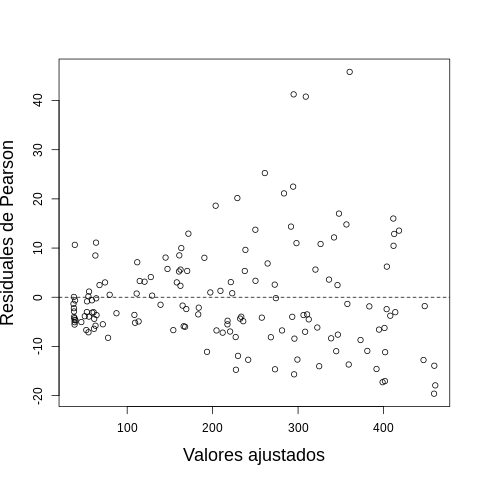

In [33]:
%%R
# Extraemos los residuos y los valores ajustados
E1 <- resid(M1, type = "pearson")
F1 <- fitted(M1)
# Grafica Residuales vs Valores Ajustados
plot(x = F1, y = E1, xlab = "Valores ajustados", 
     ylab = "Residuales de Pearson", cex.lab = 1.5)
abline(h = 0, v = 0, lty = 2)

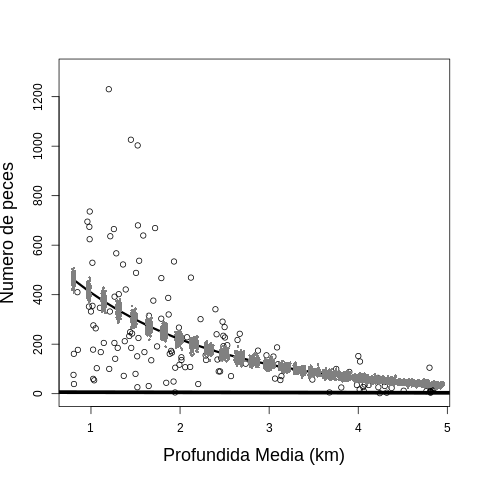

In [34]:
%%R
plot(x = Peces$Profundidad, y = Peces$Num_Peces, ylim = c(0, 1300),
     xlab = "Profundida Media (km)", 
     ylab = "Numero de peces", cex.lab = 1.5)
abline(M1, lwd = 5)
Nuevos_datos <- data.frame(Profundidad = seq(0.804, 4.865, length = 25))
P1 <- predict(M1, newdata = Nuevos_datos, type = "response")
lines(Nuevos_datos$Profundidad, P1, lwd = 3)
HL <- seq(0.804, 4.865, length = 25)
Beta <- coef(M1)
for (i in 1:25) {
    mu <- exp(Beta[1] + Beta[2] * HL[i])
    yi <- rpois(150, lambda = mu)
    points(jitter(rep(HL[i], 150)), jitter(yi), col = grey(0.5), pch = 16, cex = 0.5)
}

In [35]:
%%R
Beta

(Intercept) Profundidad 
  6.6306905  -0.6196693 


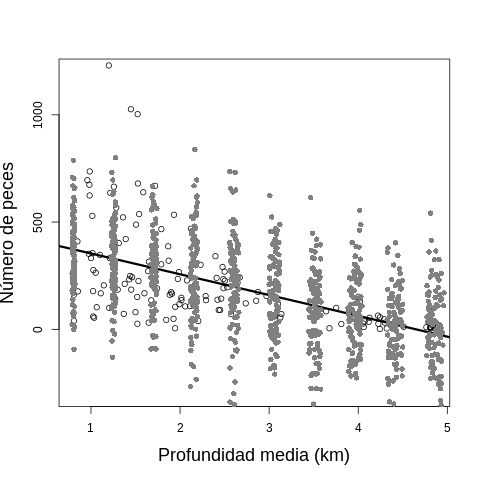

In [36]:
%%R
plot(x = Peces$Profundidad, y = Peces$Num_Peces, xlab = "Profundidad media (km)", 
     ylab = "Número de peces", cex.lab = 1.5, pch = 1, ylim = c(-300, 1200))
abline(M0, lwd = 3)
md <- seq(0.804, 4.865, length = 10)
Beta <- coef(M0)
for (i in 1:10) {
    mu <- Beta[1] + Beta[2] * md[i]
    yi <- rnorm(100, mean = mu, sd = summary(M0)$sigma)
    points(jitter(rep(md[i], 100)), jitter(yi), col = grey(0.5), pch = 16, cex = 1)
}

#### Conclusiones
- El modelo evita que existan abundancias negativas.
- El modelo ya no predice valores negativos, mejora la heterocedasticidad, pero puede mejorarse.
- La sobredispersión del modelo es de 115.6, puede ser una característica real de que se exija emplear otro tipo de modelos a consecuencia de:

  - Que falte una variable explicativa o la interacción entre algunas del modelo
  - Que existan valores extremos
  - Que alguna(s) variable explicativa(s) deban transformarse
  - Función vínculo incorrecta

La regresión de un modelo lineal generalizado con *Distribución Binomial Negativa* podría corrigir ambos problemas

In [37]:
%%R
M2 <- glm.nb(Num_Peces ~ Profundidad, data = Peces) # Un modelo de BN para estos datos es:
summary(M2)


Call:
glm.nb(formula = Num_Peces ~ Profundidad, data = Peces, init.theta = 1.842849136, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1458  -0.8267  -0.3431   0.5218   2.1736  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.83490    0.13345   51.22   <2e-16 ***
Profundidad -0.72286    0.04963  -14.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.8428) family taken to be 1)

    Null deviance: 312.80  on 146  degrees of freedom
Residual deviance: 160.02  on 145  degrees of freedom
AIC: 1772.5

Number of Fisher Scoring iterations: 1


              Theta:  1.843 
          Std. Err.:  0.205 

 2 x log-likelihood:  -1766.491 


In [41]:
%%R
E2 <- residuals(M2, type="pearson")
N <- nrow(Peces)
P <- length(coef(M2))+1 #+1 por k
Dispersion_M2 <- sum(E2^2/(N-P))
print(Dispersion_M2)
print(Dispersion_M1)

[1] 0.9273692
[1] 115.45


In [42]:
%%R
AIC(M1,M2)

   df       AIC
M1  2 16838.437
M2  3  1772.491


¿Cuál de los dos modelos es mejor?

In [43]:
%%R
#Significancia del modelo
anova(M1, M2, test = "Chisq")

Analysis of Deviance Table

Model 1: Num_Peces ~ Profundidad
Model 2: Num_Peces ~ Profundidad
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)
1       145      15860                     
2       145        160  0    15700         


La diferencia de devianzas es significativa (nos quedamos con el modelo más complejo), que en este caso es la Binomial Negativa

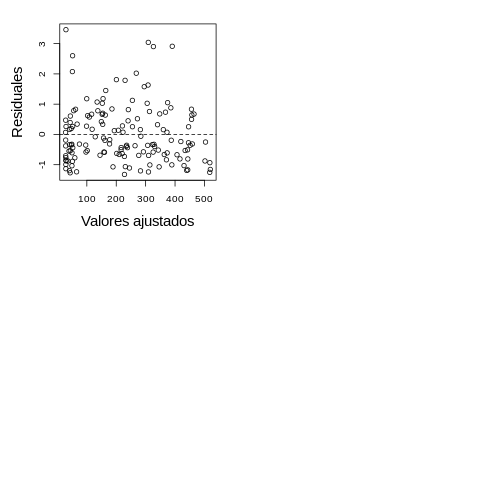

In [44]:
%%R
par(mfrow = c(2, 2), mar = c(5, 5, 2, 2))
E2 <- resid(M2, type = "pearson")
F2 <- fitted(M2, type = "response")
plot(x = F2, y = E2, xlab = "Valores ajustados", ylab = "Residuales", cex.lab = 1.5)
abline(0, 0, lty = 2)

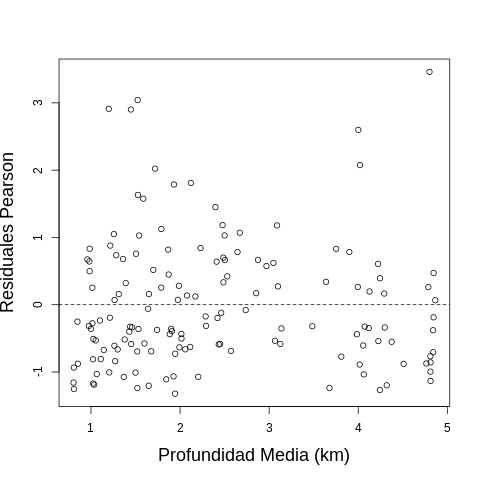

In [45]:
%%R
plot(x = Peces$Profundidad, y = E2, xlab = "Profundidad Media (km)",
     ylab = "Residuales Pearson", cex.lab = 1.5)
abline(0, 0, lty = 2)

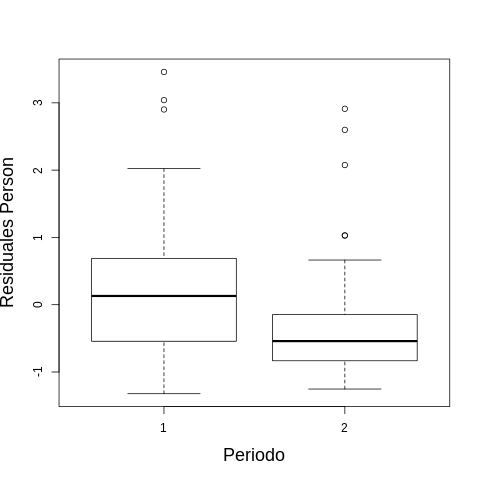

In [46]:
%%R
boxplot(E2 ~ Periodo, data = Peces, xlab = "Periodo", ylab = "Residuales Person", cex.lab = 1.5)

#### Conclusiones
- El modelo presenta mejor comportamiento en AIC
- El modelo presenta mejor comportamiento en Deviance

Para este caso la sugerencia es utilizar el modelo Binomial Negativa, pues tiene mejora en ambos indicadores.

In [0]:
%%R
incump="base_inc.csv"

data=read.csv(incump, sep=",", quote="/")
colors <- c("red", "blue", "darkgreen", "gold", "black")
attach(data)
n<-nrow(data)-1
m=ncol(data)
x=data[,3:m]
y=data[,2]
ylogr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper , family=binomial("logit"))
ylogr
xext=as.matrix(cbind(1,x))
summary(ylogr)

plot(y,type="l", lty=2, xlab="Observaciones",
     ylab="Probabilidad", main="Regresión Logística")
points(ylogr$fit, lwd=2, col=colors[1])
ylogr$fitted.values
Llogit=log(prod(((1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^y*(1-(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^(1-y)))
DLogit=-2*Llogit


ylogr_st <- ylogr %>%  stepAIC(trace = FALSE)
summary(ylogr_st)
coef(ylogr_st)
coef(ylogr)
AIC(ylogr,ylogr_st)

plot(y,type="l", lty=2, xlab="Observaciones",
     ylab="Probabilidad", main="Regresión Logística")
points(ylogr_st$fit, lwd=2, col=colors[1])


#probit

yprobr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper, family=binomial("probit"))
yprobr
yprobr$fitted.values
=
summary(yprobr)

plot(y,type="l", lty=2, xlab="Observaciones",
     ylab="Probabilidad", main="Regresión Probit")
points(yprobr$fit, lwd=2, col=colors[1])

Lprobit=log(prod((pnorm(xext%*%as.matrix(yprobr$coef),0,1))^y*(1-pnorm(xext%*%as.matrix(yprobr$coef),0,1))^(1-y)))
Dprobit=-2*Lprobit

yprobr_st <- yprobr %>%  stepAIC(trace = TRUE,direction="forward")
summary(yprobr_st)

vt=step(yprobr, direction = "backward", trace=FALSE )

coef(yprobr_st)
coef(yprobr)
AIC(yprobr,yprobr_st)

plot(y,type="l", lty=2, xlab="Observaciones",
     ylab="Probabilidad", main="Regresión Logística")
points(yprobr_st$fit, lwd=2, col=colors[1])


In [0]:
%%R


In [52]:
%%R
data(Chromatic)           # Bajamos los datos
cromatico <- Chromatic    # Guardamos los datos

print(head(cromatico))
colnames(cromatico) <- c("Log2Edad","Edad","Deterioro","Anomalia") 
summary(cromatico)  

   Log2Age  Age  Thresh   Axis
1 -2.00000 0.25 0.01861 Protan
2 -1.78588 0.29 0.03024 Protan
3 -1.78588 0.29 0.02700 Protan
4 -1.59946 0.33 0.01542 Protan
5 -1.59946 0.33 0.01585 Protan
6 -1.59946 0.33 0.03132 Protan
    Log2Edad           Edad          Deterioro          Anomalia  
 Min.   :-2.000   Min.   : 0.250   Min.   :0.000410   Deutan:172  
 1st Qu.:-0.415   1st Qu.: 0.750   1st Qu.:0.001783   Protan:172  
 Median : 0.000   Median : 1.000   Median :0.006547   Tritan:167  
 Mean   : 1.390   Mean   : 9.961   Mean   :0.008392               
 3rd Qu.: 3.170   3rd Qu.: 9.000   3rd Qu.:0.010890               
 Max.   : 6.426   Max.   :86.000   Max.   :0.059400               


In [55]:
%%R
Cromatico_P<-cromatico%>%filter(Anomalia == "Protan") # Protanopía
print(Cromatico_P)
summary(Cromatico_P)

    Log2Edad  Edad Deterioro Anomalia
1   -2.00000  0.25  0.018610   Protan
2   -1.78588  0.29  0.030240   Protan
3   -1.78588  0.29  0.027000   Protan
4   -1.59946  0.33  0.015420   Protan
5   -1.59946  0.33  0.015850   Protan
6   -1.59946  0.33  0.031320   Protan
7   -1.39593  0.38  0.010890   Protan
8   -1.39593  0.38  0.020520   Protan
9   -1.25154  0.42  0.010890   Protan
10  -1.25154  0.42  0.019440   Protan
11  -1.00000  0.50  0.008764   Protan
12  -1.00000  0.50  0.008476   Protan
13  -0.88897  0.54  0.019350   Protan
14  -0.88897  0.54  0.020850   Protan
15  -0.78588  0.58  0.019590   Protan
16  -0.78588  0.58  0.004448   Protan
17  -0.78588  0.58  0.010890   Protan
18  -0.66658  0.63  0.014690   Protan
19  -0.66658  0.63  0.008856   Protan
20  -0.66658  0.63  0.011700   Protan
21  -0.66658  0.63  0.020520   Protan
22  -0.66658  0.63  0.024410   Protan
23  -0.57777  0.67  0.006943   Protan
24  -0.57777  0.67  0.010890   Protan
25  -0.57777  0.67  0.021610   Protan
26  -0.57777

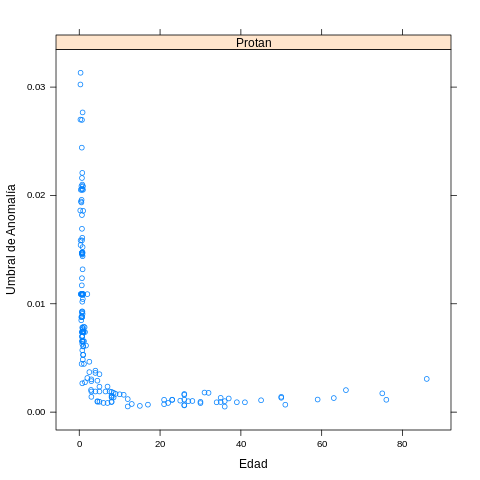

In [56]:
%%R
xyplot(Deterioro ~ Edad | Anomalia, data = Cromatico_P,xlab = "Edad", ylab = "Umbral de Anomalía")

In [0]:
%%R
t<-0

In [0]:
%%R